
# Innovationsprojekt - Daten aus dem "Motoren-Linearitätstest" eines Diagnostischen Instruments

Bevor ein Diagnostsiches Instrument für den Verkauf freigegeben wird, müssen diese ettliche Tests in der Produktion durchlaufen. Diese Tests stellen sicher, dass die Instrumente innerhalb ihrer definierten Spezifikationen liegen.

Im Rahmen diese Innovationsprojektes werden die Daten aus dem cobas® LIAT "Motoren Linearitätstests" analysiert. Es soll untersucht werden, ob die Konfigurationsdaten mit den Daten zur Motorenlienearität korrelieren und ob ggf. anhand der vorhanden Daten eine Voraussage gemacht werden kann, ob der Lin0-Test "Passen" oder "Failen" wird.



## cobas® LIAT (Lab In A Tube)

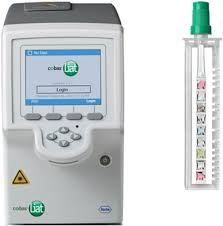

# Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras

# Daten Assessment und Datenbereinigung

### Laden des Datensets

Am Datenset wurde lediglich die Seriennummern der Instrumente annonymisiert. Sonst wurde an den Daten nichts manipuliert.

In [2]:
df = pd.read_csv("all_tests_celia_selected_Anonym.csv", sep=';')

In [3]:
pd.set_option('display.max_columns', len(df))

In [4]:
df.shape

(15630, 1036)

In [5]:
df.head()

serial_number  loop  lin0 | bklsh_motor_01_01_bklsh_1500  \
0          20002     1                                  NaN   
1          20002     2                          1519.682540   
2          20002     3                          1516.825397   
3          20002     4                                  NaN   
4          20002     5                                  NaN   

   lin0 | bklsh_motor_01_02_bklsh_1250  lin0 | bklsh_motor_01_03_bklsh_1000  \
0                                  NaN                                  NaN   
1                          1265.396825                          1015.555556   
2                          1263.492063                          1022.222222   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   lin0 | bklsh_motor_01_04_bklsh_750  lin0 | bklsh_motor_01_05_bklsh_500  \
0                                 NaN                                 NaN   
1                          771.746032                           519.68254   
2                          773.650794                           510.15873   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   lin0 | bklsh_motor_01_25_bklsh_500  lin0 | bklsh_motor_01_26_bklsh_750  \
0                                 NaN                                 NaN   
1                          382.539683                          630.793651   
2                          364.444444                          620.000000   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   lin0 | bklsh_motor_01_27_bklsh_1000  lin0 | bklsh_motor_01_28_bklsh_1250  \
0                                  NaN                                  NaN   
1                           889.523810                          1133.015873   
2                           882.857143                          1132.380952   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   lin0 | bklsh_motor_01_29_bklsh_1500  lin0 | bklsh_motor_01_bklsh_val  \
0                                  NaN                              NaN   
1                          1376.825397                       135.873016   
2                          1377.460317                       141.841270   
3                                  NaN                              NaN   
4                                  NaN                              NaN   

   lin0 | bklsh_motor_02_01_bklsh_1500  lin0 | bklsh_motor_02_02_bklsh_1250  \
0                                  NaN                                  NaN   
1                          1498.095238                          1245.079365   
2                          1506.031746                          1251.111111   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   lin0 | bklsh_motor_02_03_bklsh_1000  lin0 | bklsh_motor_02_04_bklsh_750  \
0                                  NaN                                 NaN   
1                          1005.714286                          759.365079   
2                          1011.746032                          761.269841   
3                                  NaN                                 NaN   
4                                  NaN                                 NaN   

   lin0 | bklsh_motor_02_05_bklsh_500  lin0 | bklsh_motor_02_25_bklsh_500  \
0                                 NaN                                 NaN   
1                          507.301587                          450.793651   
2                          510.476191                          387.936508   
3                                 NaN        

### Entfernen von Features, welche von der weiteren Betrachtung ausgeschlossen werden sollen, da diese keinen Bezug zur gesuchten Funktion haben

 SN: Die Seriennummer (Spalte 0)
 SN: Loop (Spalte 1)
 bklsh_motor..... (Spalten [2-11 / 13-22 ... 222-231]
 lin0 | bonsai_operator (Spalte 233)
 lin0 | bonsai_test_start_date (Spalte 235)
 lin0 | bonsai_test_version  (Spalte 236)
 lin0 | file_id (Spalte 657)
 lin0 | firsttestflag (Spalte 658)
 lin0 | from_bonsai (Spalte 659)
 lin0 | from_file (Spalte 660)
 lin0 | offset_motor.... (Spalten [682 ... 702])
 lin0 | product_type (Spalte 703)
 lin0 | test_category (Spalte 704)
 lin0 | test_end_date (Spalte 705)
 lin0 | test_status (Spalte 706)
 lin0 | workplace (Spalte 707)
 tc_optim | bonsai_operator (Spalte 708)
 tc_optim | bonsai_test_start_date (Spalte 710)
 tc_optim | bonsai_test_version (Spalte 711)
 tc_optim | firsttestflag (Spalte 712)
 tc_optim | from_bonsai (Spalte 713)
 tc_optim | from_file (Spalte 714)
 tc_optim | product_type (Spalte 1030)
 tc_optim | test_category (Spalte 1031)
 tc_optim | test_end_date (Spalte 1032)
 tc_optim | workplace (Spalte 1034)
 bucket (Spalte 1035)

In [6]:
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 235, 236, 657, 658, 659, 660, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 710, 711, 712, 713, 714, 1030, 1031, 1032, 1034, 1035
]], axis='columns')
df.head()

lin0 | bklsh_motor_01_bklsh_val  lin0 | bklsh_motor_02_bklsh_val  \
0                              NaN                              NaN   
1                       135.873016                        57.968254   
2                       141.841270                       120.317460   
3                              NaN                              NaN   
4                              NaN                              NaN   

   lin0 | bklsh_motor_03_bklsh_val  lin0 | bklsh_motor_04_bklsh_val  \
0                              NaN                              NaN   
1                       124.634921                       132.825397   
2                       125.206349                       140.253968   
3                              NaN                              NaN   
4                              NaN                              NaN   

   lin0 | bklsh_motor_05_bklsh_val  lin0 | bklsh_motor_06_bklsh_val  \
0                              NaN                              NaN   
1                       122.222222                       143.809524   
2                       119.555556                       149.333333   
3                              NaN                              NaN   
4                              NaN                              NaN   

   lin0 | bklsh_motor_07_bklsh_val  lin0 | bklsh_motor_08_bklsh_val  \
0                              NaN                              NaN   
1                       119.238095                       148.634921   
2                       112.063492                       149.650794   
3                              NaN                              NaN   
4                              NaN                              NaN   

   lin0 | bklsh_motor_09_bklsh_val  lin0 | bklsh_motor_10_bklsh_val  \
0                              NaN                              NaN   
1                       116.190476                       125.269841   
2                       117.714286                       142.666667   
3                              NaN                              NaN   
4                              NaN                              NaN   

   lin0 | bklsh_motor_11_bklsh_val  lin0 | bklsh_motor_12_bklsh_val  \
0                              NaN                              NaN   
1                       118.285714                       153.650794   
2                       114.666667                       159.238095   
3                              NaN                              NaN   
4                              NaN                              NaN   

   lin0 | bklsh_motor_13_bklsh_val  lin0 | bklsh_motor_14_bklsh_val  \
0                              NaN                              NaN   
1                       156.634921                       138.539682   
2                       153.396825                       140.444444   
3                              NaN                              NaN   
4                              NaN                              NaN   

   lin0 | bklsh_motor_15_bklsh_val  lin0 | bklsh_motor_16_bklsh_val  \
0                              NaN                              NaN   
1                       130.920635                       133.587302   
2                       136.190476                       138.412698   
3                              NaN                              NaN   
4                              NaN                              NaN   

   lin0 | bklsh_motor_17_bklsh_val  lin0 | bklsh_motor_18_bklsh_val  \
0                              NaN                              NaN   
1                       142.158730                       125.269841   
2                       147.238095                       123.238095   
3                              NaN                              NaN   
4                              NaN                              NaN   

   lin0 | bklsh_motor_19_bklsh_val  lin0 | bklsh_motor_20_bklsh_val  \
0                              NaN                              NaN   
1                 

In [7]:
df.shape

(15630, 780)

### Betrachten der Datentypen mit dem wesentlichen Ziel kategorische und nominale Variablen zu identifizieren
Dazu muss in den Options die Anzahl der Zeilen so erweitert werden, dass die Datentypen für alle Spalten angezeigt werden.
Vorher aber noch die Spaltennamen etwas bereinigen

In [8]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace(r'_\|_','_')
pd.set_option('display.max_rows', len(df.columns))
df.dtypes

lin0_bklsh_motor_01_bklsh_val                  float64
lin0_bklsh_motor_02_bklsh_val                  float64
lin0_bklsh_motor_03_bklsh_val                  float64
lin0_bklsh_motor_04_bklsh_val                  float64
lin0_bklsh_motor_05_bklsh_val                  float64
lin0_bklsh_motor_06_bklsh_val                  float64
lin0_bklsh_motor_07_bklsh_val                  float64
lin0_bklsh_motor_08_bklsh_val                  float64
lin0_bklsh_motor_09_bklsh_val                  float64
lin0_bklsh_motor_10_bklsh_val                  float64
lin0_bklsh_motor_11_bklsh_val                  float64
lin0_bklsh_motor_12_bklsh_val                  float64
lin0_bklsh_motor_13_bklsh_val                  float64
lin0_bklsh_motor_14_bklsh_val                  float64
lin0_bklsh_motor_15_bklsh_val                  float64
lin0_bklsh_motor_16_bklsh_val                  float64
lin0_bklsh_motor_17_bklsh_val                  float64
lin0_bklsh_motor_18_bklsh_val                  float64
lin0_bklsh

### Move Categorial Variables to the beginning

In [9]:
df = df.reindex(columns=sorted(df.columns))

motor_index_range = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21']

for str in motor_index_range:
 column_str = "lin0_motor_" + str + "_status"
 df = df.reindex(columns=([column_str] + list([a for a in df.columns if a != column_str]) ))

for str in motor_index_range:
 column_str = "tc_optim_motor_" + str + "_status"
 df = df.reindex(columns=([column_str] + list([a for a in df.columns if a != column_str]) ))

pd.set_option('display.max_rows', len(df.columns))

df = df.reindex(columns=(['tc_optim_test_status'] + list([a for a in df.columns if a != 'tc_optim_test_status']) ))
df = df.reindex(columns=(['tc_optim_bonsai_state'] + list([a for a in df.columns if a != 'tc_optim_bonsai_state']) ))
df = df.reindex(columns=(['lin0_bonsai_state'] + list([a for a in df.columns if a != 'lin0_bonsai_state']) ))


df.dtypes

lin0_bonsai_state                               object
tc_optim_bonsai_state                           object
tc_optim_test_status                            object
tc_optim_motor_21_status                        object
tc_optim_motor_20_status                        object
tc_optim_motor_19_status                        object
tc_optim_motor_18_status                        object
tc_optim_motor_17_status                        object
tc_optim_motor_16_status                        object
tc_optim_motor_15_status                        object
tc_optim_motor_14_status                        object
tc_optim_motor_13_status                        object
tc_optim_motor_12_status                        object
tc_optim_motor_11_status                        object
tc_optim_motor_10_status                        object
tc_optim_motor_09_status                        object
tc_optim_motor_08_status                        object
tc_optim_motor_07_status                        object
tc_optim_m

### Duplikate behandeln

#### Prüfen ob Duplikate vorhanden sind

In [10]:
df.duplicated().any()

True

Duplikate anzeigen, falls vorhanden

In [11]:
df[df.duplicated(keep=False)].head()

lin0_bonsai_state tc_optim_bonsai_state tc_optim_test_status  \
0                NaN                   NaN                  NaN   
3                NaN                   NaN                  NaN   
4                NaN                   NaN                  NaN   
6                NaN                   NaN                  NaN   
11               NaN                   NaN                  NaN   

   tc_optim_motor_21_status tc_optim_motor_20_status tc_optim_motor_19_status  \
0                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   
6                       NaN                      NaN                      NaN   
11                      NaN                      NaN                      NaN   

   tc_optim_motor_18_status tc_optim_motor_17_status tc_optim_motor_16_status  \
0                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   
6                       NaN                      NaN                      NaN   
11                      NaN                      NaN                      NaN   

   tc_optim_motor_15_status tc_optim_motor_14_status tc_optim_motor_13_status  \
0                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   
6                       NaN                      NaN                      NaN   
11                      NaN                      NaN                      NaN   

   tc_optim_motor_12_status tc_optim_motor_11_status tc_optim_motor_10_status  \
0                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   
6                       NaN                      NaN                      NaN   
11                      NaN                      NaN                      NaN   

   tc_optim_motor_09_status tc_optim_motor_08_status tc_optim_motor_07_status  \
0                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   
6                       NaN                      NaN                      NaN   
11                      NaN                      NaN                      NaN   

   tc_optim_motor_06_status tc_optim_motor_05_status tc_optim_motor_04_status  \
0                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   
6                       NaN                      NaN                      NaN   
11                      NaN                      NaN                      NaN   

   tc_optim_motor_03_status tc_optim_motor_02_status tc_optim_motor_01_status  \
0                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   
6                       NaN                      NaN                      NaN   
11                      NaN                      NaN                      NaN   

   lin0_motor_21_status lin0_motor_20_status lin0_motor_19_status  \
0                   NaN                  NaN                  NaN   
3                   NaN                  NaN         

Duplikate entfernen, falls vorhanden

In [12]:
df = df.drop_duplicates()

Grösse des Datasets nach der Bereinigung der Duplikate anzeigen

In [13]:
df.shape

(10338, 780)

### Auf Nullwerte prüfen

Prüfen ob es irgendwo Null Werte hat

In [14]:
df.isna().any().any()

True

Spalten anzeigen, welche Null Werte enthalten

In [15]:
df.columns[df.isna().any()]

Index(['lin0_bonsai_state', 'tc_optim_bonsai_state', 'tc_optim_test_status',
       'tc_optim_motor_21_status', 'tc_optim_motor_20_status',
       'tc_optim_motor_19_status', 'tc_optim_motor_18_status',
       'tc_optim_motor_17_status', 'tc_optim_motor_16_status',
       'tc_optim_motor_15_status',
       ...
       'tc_optim_motor_21_p0_lower_thermalStep_mean',
       'tc_optim_motor_21_p0_upper_thermalStep_mean',
       'tc_optim_motor_21_p1_lower_thermalStep_mean',
       'tc_optim_motor_21_p1_upper_thermalStep_mean',
       'tc_optim_motor_21_p2_lower_thermalStep_mean',
       'tc_optim_motor_21_p2_upper_thermalStep_mean',
       'tc_optim_motor_21_p3_lower_thermalStep_mean',
       'tc_optim_motor_21_p3_upper_thermalStep_mean',
       'tc_optim_motor_21_p4_lower_thermalStep_mean',
       'tc_optim_motor_21_p4_upper_thermalStep_mean'],
      dtype='object', length=780)

Zeilen mit Null Werten entfernen (alternativ könnten auch Default Werte gesetzt werden)

In [16]:
df = df.dropna(how='any', axis=0)

Grösse des Datasets nach eliminierung der Null Werte anzeigen

In [17]:
df.shape

(8719, 780)

In [18]:
df.describe()

lin0_bklsh_motor_01_bklsh_val  lin0_bklsh_motor_02_bklsh_val  \
count                    8719.000000                    8719.000000   
mean                       89.216442                      63.893617   
std                        34.393376                      44.301156   
min                       -56.126984                    -140.317460   
25%                        62.095238                      34.222222   
50%                        87.174603                      63.365079   
75%                       117.206349                      97.968254   
max                       210.666667                     207.873016   

       lin0_bklsh_motor_03_bklsh_val  lin0_bklsh_motor_04_bklsh_val  \
count                    8719.000000                    8719.000000   
mean                       64.245492                      86.482133   
std                        44.672180                      34.814732   
min                      -139.047619                     -72.888889   
25%                        34.253968                      58.571429   
50%                        63.238095                      85.015873   
75%                        98.730159                     114.539682   
max                       199.301587                     213.841270   

       lin0_bklsh_motor_05_bklsh_val  lin0_bklsh_motor_06_bklsh_val  \
count                    8719.000000                    8719.000000   
mean                       66.063627                      87.472715   
std                        43.465352                      35.299037   
min                      -146.603175                    -161.333333   
25%                        38.190476                      59.301587   
50%                        66.031746                      84.888889   
75%                        99.428571                     116.000000   
max                       208.063492                     222.539683   

       lin0_bklsh_motor_07_bklsh_val  lin0_bklsh_motor_08_bklsh_val  \
count                    8719.000000                    8719.000000   
mean                       67.555978                      88.196149   
std                        43.188031                      34.953022   
min                      -133.460318                     -69.841270   
25%                        39.174603                      59.682540   
50%                        66.349206                      86.539683   
75%                       101.142857                     116.571429   
max                       225.523810                     229.841270   

       lin0_bklsh_motor_09_bklsh_val  lin0_bklsh_motor_10_bklsh_val  \
count                    8719.000000                    8719.000000   
mean                       68.709758                      89.651951   
std                        43.054063                      34.985822   
min                      -118.158730                     -62.539683   
25%                        39.936508                      61.650794   
50%                        67.555556                      88.190476   
75%                       101.777778                     118.031746   
max                       231.746032                     219.047619   

       lin0_bklsh_motor_11_bklsh_val  lin0_bklsh_motor_12_bklsh_val  \
count                    8719.000000                    8719.000000   
mean                       72.363898                      92.380144   
std                        43.733008                      34.862641   
min                      -130.349206                     -62.476190   
25%                        42.888889                      63.936508   
50%                        71.619048                      90.222222   
75%                       106.095238                     120.190476   
max                       207.365079                     239.111111   

       lin0_bklsh_motor_13_bklsh_val  lin0_bklsh_motor_14_bklsh_val  \
count                    8719.000000                    8719.000000   
mean                     

#### Alle Status Variablen (stauts - features) sind kategorische Variablen
##### Wandeln der Variablen mit "passed" failed in kategorische varaibalen
##### Wandeln der boolschen Variablen in Integer

In [19]:
command_line = 'df.' + 'lin0_bonsai_state' + ' = ' + 'df.' + 'lin0_bonsai_state'  + '.astype(\'category\')'
exec (command_line)

command_line = 'df.' + 'tc_optim_bonsai_state' + ' = ' + 'df.' + 'tc_optim_bonsai_state'  + '.astype(\'category\')'
exec (command_line)

command_line = 'df.' + 'tc_optim_test_status' + ' = ' + 'df.' + 'tc_optim_test_status'  + '.astype(\'int\')'
exec (command_line)

motor_index_range = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21']

for str in motor_index_range:
 column_str = "lin0_motor_" + str + "_status"
 command_line = 'df.' + column_str + ' = ' + 'df.' + column_str  + '.astype(\'int\')'
 exec (command_line)

for str in motor_index_range:
 column_str = "tc_optim_motor_" + str + "_status"
 command_line = 'df.' + column_str + ' = ' + 'df.' + column_str  + '.astype(\'int\')'
 exec (command_line)

pd.set_option('display.max_rows', len(df.columns))
df.dtypes


lin0_bonsai_state                              category
tc_optim_bonsai_state                          category
tc_optim_test_status                              int32
tc_optim_motor_21_status                          int32
tc_optim_motor_20_status                          int32
tc_optim_motor_19_status                          int32
tc_optim_motor_18_status                          int32
tc_optim_motor_17_status                          int32
tc_optim_motor_16_status                          int32
tc_optim_motor_15_status                          int32
tc_optim_motor_14_status                          int32
tc_optim_motor_13_status                          int32
tc_optim_motor_12_status                          int32
tc_optim_motor_11_status                          int32
tc_optim_motor_10_status                          int32
tc_optim_motor_09_status                          int32
tc_optim_motor_08_status                          int32
tc_optim_motor_07_status                        

In [20]:
df.shape

(8719, 780)

### Kategorische Werte in Zahlenwerte transformieren 

In [21]:
def status_category_to_numeric(x):
    if x=='passed':
        return 1
    elif x=='failed':
        return 0

In [22]:
df['lin0_bonsai_state'] = df['lin0_bonsai_state'].apply(status_category_to_numeric)
df['tc_optim_bonsai_state'] = df['tc_optim_bonsai_state'].apply(status_category_to_numeric)

    

In [23]:
df.head()


lin0_bonsai_state tc_optim_bonsai_state  tc_optim_test_status  \
1                 1                     1                     1   
2                 1                     1                     1   
5                 1                     1                     1   
7                 0                     1                     1   
8                 1                     1                     1   

   tc_optim_motor_21_status  tc_optim_motor_20_status  \
1                         1                         1   
2                         1                         1   
5                         1                         1   
7                         1                         1   
8                         1                         1   

   tc_optim_motor_19_status  tc_optim_motor_18_status  \
1                         1                         1   
2                         1                         1   
5                         1                         1   
7                         1                         1   
8                         1                         1   

   tc_optim_motor_17_status  tc_optim_motor_16_status  \
1                         1                         1   
2                         1                         1   
5                         1                         1   
7                         1                         1   
8                         1                         1   

   tc_optim_motor_15_status  tc_optim_motor_14_status  \
1                         1                         1   
2                         1                         1   
5                         1                         1   
7                         1                         1   
8                         1                         1   

   tc_optim_motor_13_status  tc_optim_motor_12_status  \
1                         1                         1   
2                         1                         1   
5                         1                         1   
7                         1                         1   
8                         1                         1   

   tc_optim_motor_11_status  tc_optim_motor_10_status  \
1                         1                         1   
2                         1                         1   
5                         1                         1   
7                         1                         1   
8                         1                         1   

   tc_optim_motor_09_status  tc_optim_motor_08_status  \
1                         1                         1   
2                         1                         1   
5                         1                         1   
7                         1                         1   
8                         1                         1   

   tc_optim_motor_07_status  tc_optim_motor_06_status  \
1                         1                         1   
2                         1                         1   
5                         1                         1   
7                         1                         1   
8                         1                         1   

   tc_optim_motor_05_status  tc_optim_motor_04_status  \
1                         1                         1   
2                         1                         1   
5                         1                         1   
7                         1                         1   
8                         1                         1   

   tc_optim_motor_03_status  tc_optim_motor_02_status  \
1                         1                         1   
2                         1                         1   
5                         1                         1   
7                         1                         1   
8                         1                         1   

   tc_optim_motor_01_status  lin0_motor_21_status  lin0_motor_20_status  \
1                         1                     1                     1   
2                  

Es gibt Indikation für Ausreisser-Daten. Die Daten stammen allerdings aus realen Abnahmetests. Es wir daher nachfolgend geprüft, ob es "Failed" Lin0 Tests gibt, bei denen die Konfigurationsdaten ihren Minimal- bzw. maximalwert haben.

### Korrelations Analyse
#### Drop von Features mit einer Correaltion höher als 0.95

In [24]:
#Erzeugen der Correlation Matrix
corr_matrix = df.corr().abs()
# Oberes Dreieck der Correlation Matrix extrahieren
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Index der Features mit eine Correaltion gösser als 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['lin0_error_motor_01_19_error_400',
 'lin0_error_motor_01_20_error_300',
 'lin0_error_motor_02_05_error_3750',
 'lin0_error_motor_02_19_error_400',
 'lin0_error_motor_02_20_error_300',
 'lin0_error_motor_03_04_error_4000',
 'lin0_error_motor_03_05_error_3750',
 'lin0_error_motor_03_06_error_3500',
 'lin0_error_motor_03_07_error_3250',
 'lin0_error_motor_03_08_error_3000',
 'lin0_error_motor_03_09_error_2750',
 'lin0_error_motor_03_10_error_2500',
 'lin0_error_motor_03_19_error_400',
 'lin0_error_motor_03_20_error_300',
 'lin0_error_motor_04_19_error_400',
 'lin0_error_motor_04_20_error_300',
 'lin0_error_motor_05_05_error_3750',
 'lin0_error_motor_05_19_error_400',
 'lin0_error_motor_05_20_error_300',
 'lin0_error_motor_06_19_error_400',
 'lin0_error_motor_06_20_error_300',
 'lin0_error_motor_07_05_error_3750',
 'lin0_error_motor_07_06_error_3500',
 'lin0_error_motor_07_19_error_400',
 'lin0_error_motor_07_20_error_300',
 'lin0_error_motor_08_19_error_400',
 'lin0_error_motor_08_20_er

In [25]:
df= df.drop(df[to_drop], axis=1)

In [26]:
df.loc[df.lin0_bonsai_state == 0].head(n=3)

lin0_bonsai_state tc_optim_bonsai_state  tc_optim_test_status  \
7                  0                     1                     1   
17                 0                     1                     1   
31                 0                     1                     1   

    tc_optim_motor_21_status  tc_optim_motor_20_status  \
7                          1                         1   
17                         1                         1   
31                         1                         1   

    tc_optim_motor_19_status  tc_optim_motor_18_status  \
7                          1                         1   
17                         1                         1   
31                         1                         1   

    tc_optim_motor_17_status  tc_optim_motor_16_status  \
7                          1                         1   
17                         1                         1   
31                         1                         1   

    tc_optim_motor_15_status  tc_optim_motor_14_status  \
7                          1                         1   
17                         1                         1   
31                         1                         1   

    tc_optim_motor_13_status  tc_optim_motor_12_status  \
7                          1                         1   
17                         1                         1   
31                         1                         1   

    tc_optim_motor_11_status  tc_optim_motor_10_status  \
7                          1                         1   
17                         1                         1   
31                         1                         1   

    tc_optim_motor_09_status  tc_optim_motor_08_status  \
7                          1                         1   
17                         1                         1   
31                         1                         1   

    tc_optim_motor_07_status  tc_optim_motor_06_status  \
7                          1                         1   
17                         1                         1   
31                         1                         1   

    tc_optim_motor_05_status  tc_optim_motor_04_status  \
7                          1                         1   
17                         1                         1   
31                         1                         1   

    tc_optim_motor_03_status  tc_optim_motor_02_status  \
7                          1                         1   
17                         1                         1   
31                         1                         1   

    tc_optim_motor_01_status  lin0_motor_21_status  lin0_motor_20_status  \
7                          1                     0                     1   
17                         1                     1                     1   
31                         1                     1                     1   

    lin0_motor_19_status  lin0_motor_18_status  lin0_motor_17_status  \
7                      1                     1                     1   
17                     1                     1                     0   
31                     1                     1                     1   

    lin0_motor_16_status  lin0_motor_15_status  lin0_motor_14_status  \
7                      1                     1                     1   
17                     1                     1                     1   
31                     1                     1                     1   

    lin0_motor_13_status  lin0_motor_12_status  lin0_motor_11_status  \
7                      1                     1                     1   
17                     1                     1                     1   
31                     1                     1                     1   

    lin0_motor_10_status  lin0_motor_09_status  lin0_motor_08_status  \
7                      1                     1                     1   
17                     1                     1                     1   
31          

In [27]:
df.shape

(8719, 618)

### Hohes Riskio für Dummy Variable Trap der Status Variablen
An einigen Stellen lässt sich der lin0_bonsai_state aus den anderen katigorischen Variablen ableiten. Daher schliessen wir diese Variablen erst mal von dem Modell aus.

### Bis auf lin0_bonsai_state alle kategorische Variablen droppen

In [28]:
all_columns = df.columns
to_drop_2 = df.iloc[:,1:45].columns
df= df.drop(df[to_drop_2], axis=1)
df.shape

(8719, 574)

In [29]:
df.head(n=3)

lin0_bonsai_state  lin0_bklsh_motor_01_bklsh_val  \
1                 1                     135.873016   
2                 1                     141.841270   
5                 1                      56.000000   

   lin0_bklsh_motor_02_bklsh_val  lin0_bklsh_motor_03_bklsh_val  \
1                      57.968254                     124.634921   
2                     120.317460                     125.206349   
5                      12.253968                      21.841270   

   lin0_bklsh_motor_04_bklsh_val  lin0_bklsh_motor_05_bklsh_val  \
1                     132.825397                     122.222222   
2                     140.253968                     119.555556   
5                      48.190476                      41.841270   

   lin0_bklsh_motor_06_bklsh_val  lin0_bklsh_motor_07_bklsh_val  \
1                     143.809524                     119.238095   
2                     149.333333                     112.063492   
5                      51.174603                      46.031746   

   lin0_bklsh_motor_08_bklsh_val  lin0_bklsh_motor_09_bklsh_val  \
1                     148.634921                     116.190476   
2                     149.650794                     117.714286   
5                      85.142857                      55.365079   

   lin0_bklsh_motor_10_bklsh_val  lin0_bklsh_motor_11_bklsh_val  \
1                     125.269841                     118.285714   
2                     142.666667                     114.666667   
5                      54.920635                      41.714286   

   lin0_bklsh_motor_12_bklsh_val  lin0_bklsh_motor_13_bklsh_val  \
1                     153.650794                     156.634921   
2                     159.238095                     153.396825   
5                      74.349206                      84.952381   

   lin0_bklsh_motor_14_bklsh_val  lin0_bklsh_motor_15_bklsh_val  \
1                     138.539682                     130.920635   
2                     140.444444                     136.190476   
5                      39.555556                      66.984127   

   lin0_bklsh_motor_16_bklsh_val  lin0_bklsh_motor_17_bklsh_val  \
1                     133.587302                     142.158730   
2                     138.412698                     147.238095   
5                      61.333333                      73.206349   

   lin0_bklsh_motor_18_bklsh_val  lin0_bklsh_motor_19_bklsh_val  \
1                     125.269841                     137.460318   
2                     123.238095                     142.222222   
5                      43.111111                      34.920635   

   lin0_bklsh_motor_20_bklsh_val  lin0_bklsh_motor_21_bklsh_val  \
1                     144.507936                     147.809524   
2                     151.111111                     150.920635   
5                      49.968254                      70.222222   

   lin0_error_motor_01_01_error_4750  lin0_error_motor_01_02_error_4500  \
1                         -25.873016                          -8.253968   
2                         -27.142857                          -7.936508   
5                         -23.015873                          -4.126984   

   lin0_error_motor_01_03_error_4250  lin0_error_motor_01_04_error_4000  \
1                          -0.158730                           0.952381   
2                          -2.063492                           0.317460   
5                          10.317460                           7.619048   

   lin0_error_motor_01_05_error_3750  lin0_error_motor_01_06_error_3500  \
1                           3.968254                           3.174603   
2                           2.063492                           4.126984   
5                           7.460317                           6.349206   

   lin0_error_motor_01_07_error_3250  lin0_error_motor_01_08_error_3000  \
1                           6.825397                           8.888889   
2                           5.555556      

#### Schauen wie die Daten ausbalanciert sind

In [30]:
failed, passed = np.bincount(df['lin0_bonsai_state'])
total = passed + failed
print('Examples:\n    Total: {}\n    Passed: {} ({:.2f}% of total)\n    Failed: {} ({:.2f}% of total)\n'.format(
    total, passed, 100 * passed / total, failed, 100 * failed / total))

Examples:
    Total: 8719
    Passed: 7089 (81.31% of total)
    Failed: 1630 (18.69% of total)



### ==> The examples are imbalanced 

## Erzeugen von Training-, Validation-, und Test Set

In [31]:
#Trennen der Features von den Classifier
df_classifiers = df.loc[:,'lin0_bonsai_state'].copy()
df_features = df.drop(['lin0_bonsai_state'], axis=1).copy()
# In Train und Val-Train aufteilen
X_train, X_test_val, y_train, y_test_val = train_test_split(df_features, df_classifiers, test_size=0.4)
# Val-Train nochmals in Validation und Training splitten
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, stratify=y_test_val, test_size=0.5)
X_train.shape

(5231, 573)

# Random Forest analysis

### Modell trainieren

In [173]:
clf = RandomForestClassifier(n_jobs=2, random_state= 42, n_estimators = 100, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Prediction erstellen

In [174]:
y_val_predicted = clf.predict(X_val)
#y_test_predicted = clf.predict(X_test)

In [175]:
#clf.predict_proba(X_val)[0:10]

### Accuracy der Prediction auf Validierungsset berechnen

In [176]:
accuracy_score(y_val, y_val_predicted)

0.9237385321100917

### Recall der Prediction berechnen 

In [177]:
recall_score(y_val, y_val_predicted)

0.9823071479122435

### Precision der Prediction berechnen 

In [178]:
precision_score(y_val, y_val_predicted)

0.9278074866310161

In [179]:
def plot_confusion_matrix(cm):
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
                xticklabels=['Failed', 'Passed'],
                yticklabels=['Failed', 'Passed'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")                
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

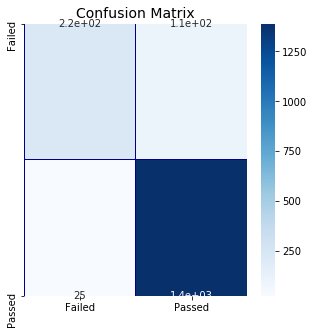

In [180]:
cm = confusion_matrix(y_val, y_val_predicted,labels = [0,1])
plot_confusion_matrix(cm)

In [181]:
#Confusion Matrix
# TN  FP
# FN  TP
cm

array([[ 223,  108],
       [  25, 1388]], dtype=int64)

### 1. Fazit
Wenn man die kategorischen Satus-Variablen löscht, dann sinkt die Accuracy von ca. 98% (oben nicht gezeigt) auf 90%. Die Anzahl der Falsch-Passed sind realtiv hoch. Das Model eignet sich daher nur bedingt für einen Qualitätstest wenn die kategorischen Variablen (siehe Step 28) zum Test Status nicht mit einbezogen werden.

Recall: Der Recall liegt bei ca 98 % was bedeutet, dass "Passed" im Verhältnis zu den "True Passed" sehr gut vorausgesagt wird.
Precision: Die Precision liegt allerdings nur bei ca. 93%  was bedeutet, dass "Passed" im Verhältnis zu den insgesamt vorausgesagten "Passed" etwas schlechter ist. Der Grund dafür ist, dass die "False Passed" etwa 4*mehr sind als "True Passed"


### Nächster Schritt
Im nächsten Schritt wird geschaut, ob sich spezielle Cluster aus den Daten bilden lassen.

In [41]:
# Daten ohne lin0_bonsai_state clustern
X = df_features.copy()

## Elbow bestimmen
- Aber zuerst die Daten normalisieren (the you will propbably fired later but not now ;-)

In [42]:
scaler = RobustScaler()
scaler.fit(X)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [43]:
distortions = []
for n_clusters in range(1, 20+1):
    est = KMeans(n_clusters=n_clusters, random_state=0).fit(scaler.transform(X))
    distortions.append(est.inertia_)

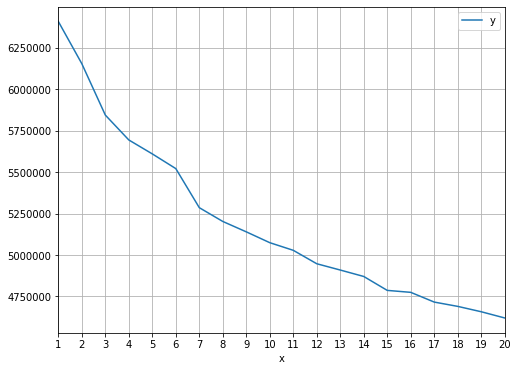

In [44]:
pd.DataFrame(dict(x=range(1, 20+1), y=distortions)).plot(x='x', y='y',
                                                         xticks=range(1, 20+1), grid=True, figsize=(8,6))

### 7 Cluster scheinen die optimale Anzahl zu sein

In [153]:
scaler = RobustScaler()
scaler.fit(X)
est = KMeans(n_clusters=7, random_state=0).fit(scaler.transform((X)))
labels = est.labels_

In [154]:
labels[0:300]

array([0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 6, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 6, 6, 6, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       1, 0, 0, 0, 4, 0, 1, 1, 0, 1, 6, 1, 0, 0, 6, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 6, 6, 0, 1, 0, 6, 6, 6, 6, 1, 1, 0, 6, 0, 1, 0,
       6, 0, 0, 1, 0, 0, 0, 0, 1, 6, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 6, 6, 1, 1, 0, 6, 6, 6, 4, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 6, 4, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 1, 0, 6, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 6, 6, 6, 1, 0, 0, 0, 1, 0, 0, 0, 6,
       6, 6, 6, 6, 6, 0, 1, 0, 1, 0, 0, 0, 0, 0, 4, 6, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 6, 6, 6, 6, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 0, 6,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6])

In [155]:
X.head()

lin0_bklsh_motor_01_bklsh_val  lin0_bklsh_motor_02_bklsh_val  \
1                     135.873016                      57.968254   
2                     141.841270                     120.317460   
5                      56.000000                      12.253968   
7                     127.111111                      92.507937   
8                     130.158730                      92.380952   

   lin0_bklsh_motor_03_bklsh_val  lin0_bklsh_motor_04_bklsh_val  \
1                     124.634921                     132.825397   
2                     125.206349                     140.253968   
5                      21.841270                      48.190476   
7                     138.222222                     124.253968   
8                     134.031746                     128.825397   

   lin0_bklsh_motor_05_bklsh_val  lin0_bklsh_motor_06_bklsh_val  \
1                     122.222222                     143.809524   
2                     119.555556                     149.333333   
5                      41.841270                      51.174603   
7                     148.063492                     129.777778   
8                     150.222222                     141.587302   

   lin0_bklsh_motor_07_bklsh_val  lin0_bklsh_motor_08_bklsh_val  \
1                     119.238095                     148.634921   
2                     112.063492                     149.650794   
5                      46.031746                      85.142857   
7                     128.317460                     104.253968   
8                     126.793651                     113.714286   

   lin0_bklsh_motor_09_bklsh_val  lin0_bklsh_motor_10_bklsh_val  \
1                     116.190476                     125.269841   
2                     117.714286                     142.666667   
5                      55.365079                      54.920635   
7                     107.047619                     143.428571   
8                     104.190476                     149.650794   

   lin0_bklsh_motor_11_bklsh_val  lin0_bklsh_motor_12_bklsh_val  \
1                     118.285714                     153.650794   
2                     114.666667                     159.238095   
5                      41.714286                      74.349206   
7                     154.349206                     147.809524   
8                     153.460318                     154.920635   

   lin0_bklsh_motor_13_bklsh_val  lin0_bklsh_motor_14_bklsh_val  \
1                     156.634921                     138.539682   
2                     153.396825                     140.444444   
5                      84.952381                      39.555556   
7                     128.317460                     124.825397   
8                     129.079365                     126.285714   

   lin0_bklsh_motor_15_bklsh_val  lin0_bklsh_motor_16_bklsh_val  \
1                     130.920635                     133.587302   
2                     136.190476                     138.412698   
5                      66.984127                      61.333333   
7                     139.809524                     147.619048   
8                     146.984127                     151.936508   

   lin0_bklsh_motor_17_bklsh_val  lin0_bklsh_motor_18_bklsh_val  \
1                     142.158730                     125.269841   
2                     147.238095                     123.238095   
5                      73.206349                      43.111111   
7                     142.984127                     143.746032   
8                     143.238095                     145.587302   

   lin0_bklsh_motor_19_bklsh_val  lin0_bklsh_motor_20_bklsh_val  \
1                     137.460318                     144.507936   
2                     142.222222                     151.111111   
5                      34.920635                      49.968254   
7                     135.555556                     143.873016   
8                     135.873016         

In [156]:
X_Labeled = X.copy()
X_Labeled.insert(loc=0, column = 'Label', value = labels)
X_Labeled.insert(loc=1, column = 'lin0_bonsai_state', value = df_classifiers)
                
X_Cluster_1 = X_Labeled.loc[X_Labeled.Label == 0]
X_Cluster_2 = X_Labeled.loc[X_Labeled.Label == 1]
X_Cluster_3 = X_Labeled.loc[X_Labeled.Label == 2]
X_Cluster_4 = X_Labeled.loc[X_Labeled.Label == 3]
X_Cluster_5 = X_Labeled.loc[X_Labeled.Label == 4]
X_Cluster_6 = X_Labeled.loc[X_Labeled.Label == 5]
X_Cluster_7 = X_Labeled.loc[X_Labeled.Label == 6]


In [157]:
X.head()

lin0_bklsh_motor_01_bklsh_val  lin0_bklsh_motor_02_bklsh_val  \
1                     135.873016                      57.968254   
2                     141.841270                     120.317460   
5                      56.000000                      12.253968   
7                     127.111111                      92.507937   
8                     130.158730                      92.380952   

   lin0_bklsh_motor_03_bklsh_val  lin0_bklsh_motor_04_bklsh_val  \
1                     124.634921                     132.825397   
2                     125.206349                     140.253968   
5                      21.841270                      48.190476   
7                     138.222222                     124.253968   
8                     134.031746                     128.825397   

   lin0_bklsh_motor_05_bklsh_val  lin0_bklsh_motor_06_bklsh_val  \
1                     122.222222                     143.809524   
2                     119.555556                     149.333333   
5                      41.841270                      51.174603   
7                     148.063492                     129.777778   
8                     150.222222                     141.587302   

   lin0_bklsh_motor_07_bklsh_val  lin0_bklsh_motor_08_bklsh_val  \
1                     119.238095                     148.634921   
2                     112.063492                     149.650794   
5                      46.031746                      85.142857   
7                     128.317460                     104.253968   
8                     126.793651                     113.714286   

   lin0_bklsh_motor_09_bklsh_val  lin0_bklsh_motor_10_bklsh_val  \
1                     116.190476                     125.269841   
2                     117.714286                     142.666667   
5                      55.365079                      54.920635   
7                     107.047619                     143.428571   
8                     104.190476                     149.650794   

   lin0_bklsh_motor_11_bklsh_val  lin0_bklsh_motor_12_bklsh_val  \
1                     118.285714                     153.650794   
2                     114.666667                     159.238095   
5                      41.714286                      74.349206   
7                     154.349206                     147.809524   
8                     153.460318                     154.920635   

   lin0_bklsh_motor_13_bklsh_val  lin0_bklsh_motor_14_bklsh_val  \
1                     156.634921                     138.539682   
2                     153.396825                     140.444444   
5                      84.952381                      39.555556   
7                     128.317460                     124.825397   
8                     129.079365                     126.285714   

   lin0_bklsh_motor_15_bklsh_val  lin0_bklsh_motor_16_bklsh_val  \
1                     130.920635                     133.587302   
2                     136.190476                     138.412698   
5                      66.984127                      61.333333   
7                     139.809524                     147.619048   
8                     146.984127                     151.936508   

   lin0_bklsh_motor_17_bklsh_val  lin0_bklsh_motor_18_bklsh_val  \
1                     142.158730                     125.269841   
2                     147.238095                     123.238095   
5                      73.206349                      43.111111   
7                     142.984127                     143.746032   
8                     143.238095                     145.587302   

   lin0_bklsh_motor_19_bklsh_val  lin0_bklsh_motor_20_bklsh_val  \
1                     137.460318                     144.507936   
2                     142.222222                     151.111111   
5                      34.920635                      49.968254   
7                     135.555556                     143.873016   
8                     135.873016         

In [158]:
print ('Beispiele im Cluster: ' + repr(X_Cluster_1.shape[0]))
print ('Failed in %')
print (X_Cluster_1.loc[X_Cluster_1.lin0_bonsai_state == 0].shape[0] / X_Cluster_1.shape[0] * 100)

Beispiele im Cluster: 3024
Failed in %
14.484126984126986


In [159]:
print ('Beispiele im Cluster: ' + repr(X_Cluster_2.shape[0]))
print ('Failed in %')
print (X_Cluster_2.loc[X_Cluster_2.lin0_bonsai_state == 0].shape[0] / X_Cluster_2.shape[0] * 100)

Beispiele im Cluster: 1809
Failed in %
27.142067440574902


In [160]:
print ('Beispiele im Cluster: ' + repr(X_Cluster_3.shape[0]))
print ('Failed in %')
print (X_Cluster_3.loc[X_Cluster_3.lin0_bonsai_state == 0].shape[0] / X_Cluster_3.shape[0] * 100)

Beispiele im Cluster: 2
Failed in %
50.0


In [165]:
print ('Beispiele im Cluster: ' + repr(X_Cluster_4.shape[0]))
print ('Failed in %')
print (X_Cluster_4.loc[X_Cluster_4.lin0_bonsai_state == 0].shape[0] / X_Cluster_4.shape[0] * 100)

Beispiele im Cluster: 100
Failed in %
72.0


In [166]:
print ('Beispiele im Cluster: ' + repr(X_Cluster_5.shape[0]))
print ('Failed in %')
print (X_Cluster_5.loc[X_Cluster_5.lin0_bonsai_state == 0].shape[0] / X_Cluster_5.shape[0] * 100)

Beispiele im Cluster: 494
Failed in %
70.8502024291498


In [163]:
print ('Beispiele im Cluster: ' + repr(X_Cluster_6.shape[0]))
print ('Failed in %')
print (X_Cluster_6.loc[X_Cluster_6.lin0_bonsai_state == 0].shape[0] / X_Cluster_6.shape[0] * 100)

Beispiele im Cluster: 2
Failed in %
100.0


In [164]:
print ('Beispiele im Cluster: ' + repr(X_Cluster_7.shape[0]))
print ('Failed in %')
print (X_Cluster_7.loc[X_Cluster_7.lin0_bonsai_state == 0].shape[0] / X_Cluster_7.shape[0] * 100)

Beispiele im Cluster: 3288
Failed in %
8.394160583941606


### 2. Fazit
Basierend auf der Elbow Kurve wurden 7 Cluster gebildet. In den Cluster 1 und 6 befinden sich zwei Samples. Cluster 1 und 6 sind somit kein repräsentativen Cluster. Cluster 4 und 5 zeigen mit ca. 70% die höchste Rate an failed Tests und könnte somit vielleicht Hinweise geben, welche Faktoren ein Failed begünstigen können. Das Cluster wird aber nicht weiter analysiert, da 70% immernoch zu schlecht sind.

In [54]:
X_Cluster_3.describe()

Label  lin0_bklsh_motor_01_bklsh_val  lin0_bklsh_motor_02_bklsh_val  \
count  3496.0                    3496.000000                    3496.000000   
mean      2.0                      61.539247                      36.678036   
std       0.0                      21.536916                      31.215497   
min       2.0                     -54.285714                    -101.650794   
25%       2.0                      48.126984                      18.095238   
50%       2.0                      60.063492                      39.111111   
75%       2.0                      73.412698                      56.523810   
max       2.0                     163.492064                     156.698413   

       lin0_bklsh_motor_03_bklsh_val  lin0_bklsh_motor_04_bklsh_val  \
count                    3496.000000                    3496.000000   
mean                       36.097109                      58.326759   
std                        33.148201                      21.656638   
min                      -132.444444                     -72.888889   
25%                        17.888889                      44.634921   
50%                        38.920635                      56.888889   
75%                        57.079365                      69.650794   
max                       192.825397                     165.523809   

       lin0_bklsh_motor_05_bklsh_val  lin0_bklsh_motor_06_bklsh_val  \
count                    3496.000000                    3496.000000   
mean                       39.233664                      58.722622   
std                        31.785685                      21.683207   
min                      -105.777778                     -65.777778   
25%                        21.841270                      45.317460   
50%                        42.349206                      57.333333   
75%                        59.555556                      70.222222   
max                       144.888889                     159.936508   

       lin0_bklsh_motor_07_bklsh_val  lin0_bklsh_motor_08_bklsh_val  \
count                    3496.000000                    3496.000000   
mean                       40.293015                      59.316879   
std                        30.570328                      21.166684   
min                      -133.460318                     -43.238095   
25%                        23.809524                      46.079365   
50%                        43.238095                      57.777778   
75%                        58.920635                      70.984127   
max                       162.476191                     147.619048   

       lin0_bklsh_motor_09_bklsh_val  lin0_bklsh_motor_10_bklsh_val  \
count                    3496.000000                    3496.000000   
mean                       42.284389                      61.458955   
std                        30.687586                      22.071024   
min                      -118.158730                     -62.539683   
25%                        24.698413                      47.682540   
50%                        45.079365                      60.253968   
75%                        61.777778                      72.571429   
max                       177.079365                     185.587302   

       lin0_bklsh_motor_11_bklsh_val  lin0_bklsh_motor_12_bklsh_val  \
count                    3496.000000                    3496.000000   
mean                       45.311013                      63.693146   
std                        31.065780                      20.889660   
min                      -123.365079                     -62.476190   
25%                        28.126984                      50.793651   
50%                        47.523810                      62.095238   
75%                        64.190476                      74.920635   
max                       195.428571                     168.698413   

       lin0_bklsh_motor_13_bklsh_val  lin0_bklsh_motor_14_bklsh_val  \
count                    

In [55]:
X_Cluster_4.describe()

Label  lin0_bklsh_motor_01_bklsh_val  lin0_bklsh_motor_02_bklsh_val  \
count  1026.0                    1026.000000                    1026.000000   
mean      3.0                      93.059129                      53.349670   
std       0.0                      33.520809                      52.729312   
min       3.0                     -56.126984                    -140.317460   
25%       3.0                      69.476190                      20.825397   
50%       3.0                      91.396825                      54.984127   
75%       3.0                     120.126984                      94.777778   
max       3.0                     198.793651                     192.000000   

       lin0_bklsh_motor_03_bklsh_val  lin0_bklsh_motor_04_bklsh_val  \
count                    1026.000000                    1026.000000   
mean                       62.028528                      91.130728   
std                        47.124602                      34.374831   
min                      -139.047619                     -34.476190   
25%                        31.253968                      66.031746   
50%                        64.698413                      90.730159   
75%                       100.888889                     118.349206   
max                       162.476191                     202.031746   

       lin0_bklsh_motor_05_bklsh_val  lin0_bklsh_motor_06_bklsh_val  \
count                    1026.000000                    1026.000000   
mean                       55.137040                      91.485194   
std                        49.503706                      34.455158   
min                      -146.603175                    -161.333333   
25%                        23.444444                      67.317460   
50%                        58.412698                      90.095238   
75%                        91.904762                     118.031746   
max                       186.031746                     204.634921   

       lin0_bklsh_motor_07_bklsh_val  lin0_bklsh_motor_08_bklsh_val  \
count                    1026.000000                    1026.000000   
mean                       58.773663                      93.277143   
std                        49.494790                      34.889345   
min                      -118.349206                     -69.841270   
25%                        29.238095                      67.190476   
50%                        62.095238                      92.666667   
75%                        96.380952                     121.444444   
max                       190.984127                     206.476191   

       lin0_bklsh_motor_09_bklsh_val  lin0_bklsh_motor_10_bklsh_val  \
count                    1026.000000                    1026.000000   
mean                       55.620285                      93.509886   
std                        49.069632                      33.498594   
min                      -116.634921                     -22.984127   
25%                        23.936508                      67.777778   
50%                        58.000000                      92.698413   
75%                        92.000000                     121.317460   
max                       198.666667                     208.952381   

       lin0_bklsh_motor_11_bklsh_val  lin0_bklsh_motor_12_bklsh_val  \
count                    1026.000000                    1026.000000   
mean                       61.447693                      95.989418   
std                        48.825885                      33.410130   
min                      -130.349206                     -56.444444   
25%                        29.841270                      71.111111   
50%                        62.857143                      93.301587   
75%                        98.047619                     123.809524   
max                       199.047619                     201.714286   

       lin0_bklsh_motor_13_bklsh_val  lin0_bklsh_motor_14_bklsh_val  \
count                    

### Nächster Schritt
Trainieren eines neuronalen Netzes.
- Depp Neuronal Netwerk
- Optimal Loss Function for binary catigorical problems = "binary  cross entropy"

In [56]:
df_features.head()

lin0_bklsh_motor_01_bklsh_val  lin0_bklsh_motor_02_bklsh_val  \
1                     135.873016                      57.968254   
2                     141.841270                     120.317460   
5                      56.000000                      12.253968   
7                     127.111111                      92.507937   
8                     130.158730                      92.380952   

   lin0_bklsh_motor_03_bklsh_val  lin0_bklsh_motor_04_bklsh_val  \
1                     124.634921                     132.825397   
2                     125.206349                     140.253968   
5                      21.841270                      48.190476   
7                     138.222222                     124.253968   
8                     134.031746                     128.825397   

   lin0_bklsh_motor_05_bklsh_val  lin0_bklsh_motor_06_bklsh_val  \
1                     122.222222                     143.809524   
2                     119.555556                     149.333333   
5                      41.841270                      51.174603   
7                     148.063492                     129.777778   
8                     150.222222                     141.587302   

   lin0_bklsh_motor_07_bklsh_val  lin0_bklsh_motor_08_bklsh_val  \
1                     119.238095                     148.634921   
2                     112.063492                     149.650794   
5                      46.031746                      85.142857   
7                     128.317460                     104.253968   
8                     126.793651                     113.714286   

   lin0_bklsh_motor_09_bklsh_val  lin0_bklsh_motor_10_bklsh_val  \
1                     116.190476                     125.269841   
2                     117.714286                     142.666667   
5                      55.365079                      54.920635   
7                     107.047619                     143.428571   
8                     104.190476                     149.650794   

   lin0_bklsh_motor_11_bklsh_val  lin0_bklsh_motor_12_bklsh_val  \
1                     118.285714                     153.650794   
2                     114.666667                     159.238095   
5                      41.714286                      74.349206   
7                     154.349206                     147.809524   
8                     153.460318                     154.920635   

   lin0_bklsh_motor_13_bklsh_val  lin0_bklsh_motor_14_bklsh_val  \
1                     156.634921                     138.539682   
2                     153.396825                     140.444444   
5                      84.952381                      39.555556   
7                     128.317460                     124.825397   
8                     129.079365                     126.285714   

   lin0_bklsh_motor_15_bklsh_val  lin0_bklsh_motor_16_bklsh_val  \
1                     130.920635                     133.587302   
2                     136.190476                     138.412698   
5                      66.984127                      61.333333   
7                     139.809524                     147.619048   
8                     146.984127                     151.936508   

   lin0_bklsh_motor_17_bklsh_val  lin0_bklsh_motor_18_bklsh_val  \
1                     142.158730                     125.269841   
2                     147.238095                     123.238095   
5                      73.206349                      43.111111   
7                     142.984127                     143.746032   
8                     143.238095                     145.587302   

   lin0_bklsh_motor_19_bklsh_val  lin0_bklsh_motor_20_bklsh_val  \
1                     137.460318                     144.507936   
2                     142.222222                     151.111111   
5                      34.920635                      49.968254   
7                     135.555556                     143.873016   
8                     135.873016         

In [57]:
df_classifiers.head()

1    1
2    1
5    1
7    0
8    1
Name: lin0_bonsai_state, dtype: category
Categories (2, int64): [0, 1]

### Train a deep neuronal network

In [58]:
df_features.shape

(8719, 573)

In [59]:
x = df_features.values[:,0:573]
y_label = df_classifiers.values
y = keras.utils.to_categorical(y_label, num_classes=2)

In [60]:
x

array([[1.35873016e+02, 5.79682540e+01, 1.24634921e+02, ...,
        7.41700000e+03, 8.37500000e+03, 8.42800000e+03],
       [1.41841270e+02, 1.20317460e+02, 1.25206349e+02, ...,
        7.41700000e+03, 8.36900000e+03, 8.42800000e+03],
       [5.60000000e+01, 1.22539682e+01, 2.18412698e+01, ...,
        7.40800000e+03, 8.45600000e+03, 8.47100000e+03],
       ...,
       [6.57142857e+01, 4.86349206e+01, 4.60317460e+01, ...,
        7.40300000e+03, 8.47000000e+03, 8.48900000e+03],
       [7.48571429e+01, 5.98095238e+01, 5.26349206e+01, ...,
        7.40700000e+03, 8.47500000e+03, 8.48600000e+03],
       [3.75873016e+01, 1.26984127e-01, 4.25396825e+01, ...,
        7.41000000e+03, 8.42600000e+03, 8.45700000e+03]])

#### Z-Normalisierung der Daten

In [61]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


#### Training-, Validierung- und Testdaten fü neuronale Netze

In [62]:
X_train_nn = X_train #.values[:,0:573]
X_val_nn = X_val #.values[:,0:573]
X_test_nn = X_test
#y_train_label = y_train.values
#y_val_label = y_val.values
y_train_nn = np.array(y_train.values)
y_val_nn = np.array(y_val.values)
y_test_nn = np.array(y_test.values)

#### Metriken festlegen

In [63]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

#### Metrik Plot festlegen

In [64]:
def plot_all_2(history):
    plt.plot(subplots=True)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
    plt.title('Recall')
    plt.xlabel('epoch')
    plt.ylabel('recall')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['precision'])
    plt.plot(history.history['val_precision'])
    plt.title('Precision')
    plt.xlabel('epoch')
    plt.ylabel('Precision')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    

### Neuronales Netzwerk Modell 1 definieren und trainieren

In [65]:
model_deeper_1 = keras.Sequential()
model_deeper_1.add(keras.layers.Dense(573, activation='relu', input_shape=[573]))
model_deeper_1.add(keras.layers.Dense(1146, activation='relu'))
model_deeper_1.add(keras.layers.Dense(2292, activation='relu'))
model_deeper_1.add(keras.layers.Dense(1146, activation='relu'))
model_deeper_1.add(keras.layers.Dense(1, activation='sigmoid'))
model_deeper_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics= METRICS)

In [66]:
model_deeper_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 573)               328902    
_________________________________________________________________
dense_1 (Dense)              (None, 1146)              657804    
_________________________________________________________________
dense_2 (Dense)              (None, 2292)              2628924   
_________________________________________________________________
dense_3 (Dense)              (None, 1146)              2627778   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1147      
Total params: 6,244,555
Trainable params: 6,244,555
Non-trainable params: 0
_________________________________________________________________


In [182]:
history_1 = model_deeper_1.fit(X_train_nn, y_train_nn, validation_data = (X_val_nn, y_val_nn), epochs=30, batch_size=200, shuffle=True)

Train on 5231 samples, validate on 1744 samples
Epoch 1/30
5231/5231 [==============================] - 7s 1ms/sample - loss: 0.0037 - tp: 4260.0000 - fp: 2.0000 - tn: 966.0000 - fn: 3.0000 - accuracy: 0.9990 - precision: 0.9995 - recall: 0.9993 - auc: 1.0000 - val_loss: 1.3038 - val_tp: 1315.0000 - val_fp: 148.0000 - val_tn: 183.0000 - val_fn: 98.0000 - val_accuracy: 0.8589 - val_precision: 0.8988 - val_recall: 0.9306 - val_auc: 0.7778
Epoch 2/30
5231/5231 [==============================] - 7s 1ms/sample - loss: 0.0271 - tp: 4237.0000 - fp: 18.0000 - tn: 950.0000 - fn: 26.0000 - accuracy: 0.9916 - precision: 0.9958 - recall: 0.9939 - auc: 0.9973 - val_loss: 1.0222 - val_tp: 1317.0000 - val_fp: 167.0000 - val_tn: 164.0000 - val_fn: 96.0000 - val_accuracy: 0.8492 - val_precision: 0.8875 - val_recall: 0.9321 - val_auc: 0.7784
Epoch 3/30
5231/5231 [==============================] - 7s 1ms/sample - loss: 0.0085 - tp: 4255.0000 - fp: 6.0000 - tn: 962.0000 - fn: 8.0000 - accuracy: 0.9973 - p

Epoch 22/30
5231/5231 [==============================] - 6s 1ms/sample - loss: 0.0102 - tp: 4253.0000 - fp: 7.0000 - tn: 961.0000 - fn: 10.0000 - accuracy: 0.9968 - precision: 0.9984 - recall: 0.9977 - auc: 0.9989 - val_loss: 1.0017 - val_tp: 1273.0000 - val_fp: 139.0000 - val_tn: 192.0000 - val_fn: 140.0000 - val_accuracy: 0.8400 - val_precision: 0.9016 - val_recall: 0.9009 - val_auc: 0.7987
Epoch 23/30
5231/5231 [==============================] - 6s 1ms/sample - loss: 0.0100 - tp: 4254.0000 - fp: 4.0000 - tn: 964.0000 - fn: 9.0000 - accuracy: 0.9975 - precision: 0.9991 - recall: 0.9979 - auc: 0.9988 - val_loss: 1.1977 - val_tp: 1330.0000 - val_fp: 166.0000 - val_tn: 165.0000 - val_fn: 83.0000 - val_accuracy: 0.8572 - val_precision: 0.8890 - val_recall: 0.9413 - val_auc: 0.7721
Epoch 24/30
5231/5231 [==============================] - 7s 1ms/sample - loss: 0.0121 - tp: 4255.0000 - fp: 8.0000 - tn: 960.0000 - fn: 8.0000 - accuracy: 0.9969 - precision: 0.9981 - recall: 0.9981 - auc: 0.99

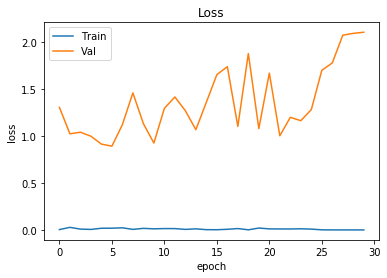

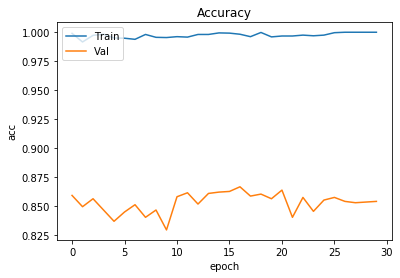

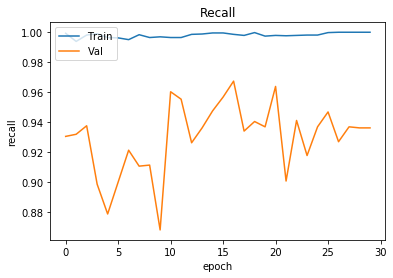

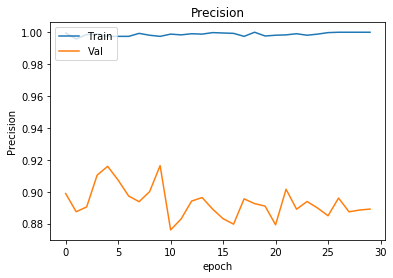

In [183]:
plot_all_2(history_1)

### Fazit:
Es kommt recht schnell zu einem overfitting (Validation Daten Accuracy bleibt gleich). Es wird daher mit einem zweiten Modell versucht das overfitting mit L2 Penalty zu verbessern.

### Neuronales Netzwerk Modell 2 definieren und trainieren

In [69]:
alpha = 0.005
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_deeper_reg_2 = keras.Sequential()
model_deeper_reg_2.add(keras.layers.Dense(573, kernel_regularizer=keras.regularizers.l2(alpha), activation='relu', input_shape=[573]))
model_deeper_reg_2.add(keras.layers.Dense(1146, kernel_regularizer=keras.regularizers.l2(alpha), activation='relu'))
model_deeper_reg_2.add(keras.layers.Dense(2292, kernel_regularizer=keras.regularizers.l2(alpha), activation='relu'))
model_deeper_reg_2.add(keras.layers.Dense(1146, kernel_regularizer=keras.regularizers.l2(alpha), activation='relu'))
model_deeper_reg_2.add(keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(alpha), activation='sigmoid'))
model_deeper_reg_2.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics= METRICS)

In [70]:
history_2 = model_deeper_reg_2.fit(X_train_nn, y_train_nn, validation_data = (X_val_nn, y_val_nn), epochs=30, batch_size=573, shuffle=True)

Train on 5231 samples, validate on 1744 samples
Epoch 1/30
5231/5231 [==============================] - 6s 1ms/sample - loss: 20.2231 - tp: 3807.0000 - fp: 855.0000 - tn: 113.0000 - fn: 456.0000 - accuracy: 0.7494 - precision: 0.8166 - recall: 0.8930 - auc: 0.4521 - val_loss: 15.6480 - val_tp: 1413.0000 - val_fp: 331.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.8102 - val_precision: 0.8102 - val_recall: 1.0000 - val_auc: 0.2197
Epoch 2/30
5231/5231 [==============================] - 4s 693us/sample - loss: 13.1338 - tp: 4263.0000 - fp: 968.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.8149 - precision: 0.8149 - recall: 1.0000 - auc: 0.4617 - val_loss: 9.9593 - val_tp: 1413.0000 - val_fp: 331.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.8102 - val_precision: 0.8102 - val_recall: 1.0000 - val_auc: 0.6393
Epoch 3/30
5231/5231 [==============================] - 4s 729us/sample - loss: 8.2896 - tp: 4263.0000 - fp: 920.0000 - tn: 48.0000 - fn: 0

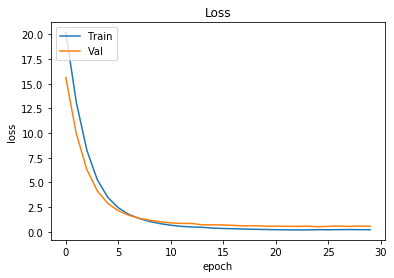

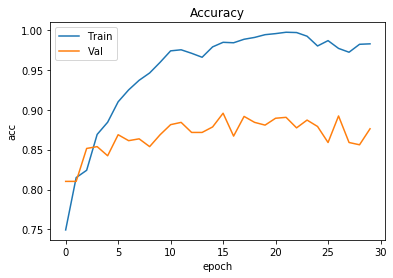

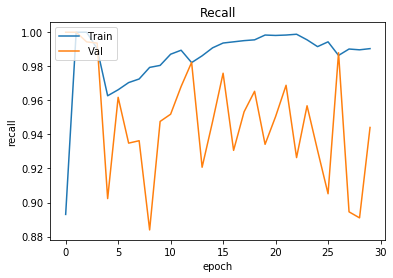

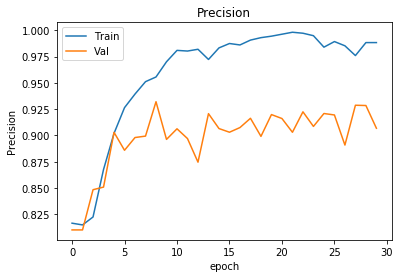

In [71]:
plot_all_2(history_2)

### Gewichte anpassen um Imbalance von Passed/Failed auszugleichen

In [72]:
weight_for_0 = (1 / failed)*(total)/2.0 
weight_for_1 = (1 / passed)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for Lin 0 staus 0: {:.2f}'.format(weight_for_0))
print('Weight for Lin 0 staus 1: {:.2f}'.format(weight_for_1))

Weight for Lin 0 staus 0: 2.67
Weight for Lin 0 staus 1: 0.61


### Neuronales Netzwerk Modell 3 definieren und trainieren

In [73]:
alpha = 0.005
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_deeper_reg_3 = keras.Sequential()
model_deeper_reg_3.add(keras.layers.Dense(573, kernel_regularizer=keras.regularizers.l2(alpha), activation='relu', input_shape=[573]))
model_deeper_reg_3.add(keras.layers.Dense(1146, kernel_regularizer=keras.regularizers.l2(alpha), activation='relu'))
model_deeper_reg_3.add(keras.layers.Dense(2292, kernel_regularizer=keras.regularizers.l2(alpha), activation='relu'))
model_deeper_reg_3.add(keras.layers.Dense(1146, kernel_regularizer=keras.regularizers.l2(alpha), activation='relu'))
model_deeper_reg_3.add(keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(alpha), activation='sigmoid'))
model_deeper_reg_3.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics= METRICS)

In [74]:
history_3 = model_deeper_reg_3.fit(X_train_nn, y_train_nn, validation_data = (X_val_nn, y_val_nn), epochs=30, batch_size=573, shuffle=True,
              class_weight = class_weight)

Train on 5231 samples, validate on 1744 samples
Epoch 1/30
5231/5231 [==============================] - 7s 1ms/sample - loss: 19.9374 - tp: 1077.0000 - fp: 222.0000 - tn: 746.0000 - fn: 3186.0000 - accuracy: 0.3485 - precision: 0.8291 - recall: 0.2526 - auc: 0.6620 - val_loss: 15.5351 - val_tp: 769.0000 - val_fp: 66.0000 - val_tn: 265.0000 - val_fn: 644.0000 - val_accuracy: 0.5929 - val_precision: 0.9210 - val_recall: 0.5442 - val_auc: 0.7784
Epoch 2/30
5231/5231 [==============================] - 4s 712us/sample - loss: 13.2653 - tp: 1400.0000 - fp: 81.0000 - tn: 887.0000 - fn: 2863.0000 - accuracy: 0.4372 - precision: 0.9453 - recall: 0.3284 - auc: 0.7818 - val_loss: 10.3942 - val_tp: 793.0000 - val_fp: 68.0000 - val_tn: 263.0000 - val_fn: 620.0000 - val_accuracy: 0.6055 - val_precision: 0.9210 - val_recall: 0.5612 - val_auc: 0.7832
Epoch 3/30
5231/5231 [==============================] - 4s 731us/sample - loss: 8.8785 - tp: 2801.0000 - fp: 209.0000 - tn: 759.0000 - fn: 1462.0000 - ac

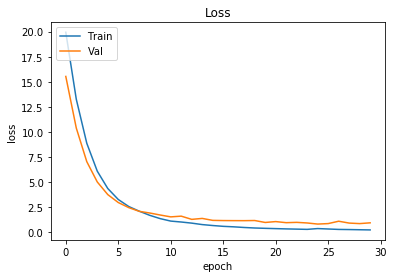

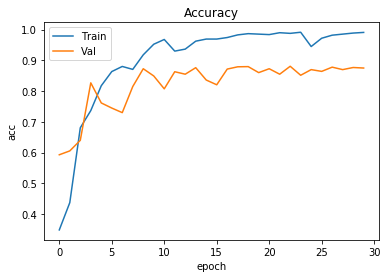

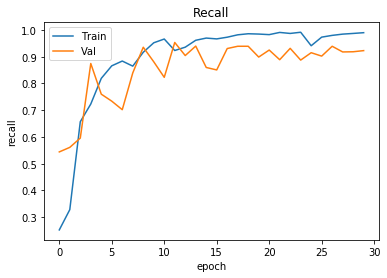

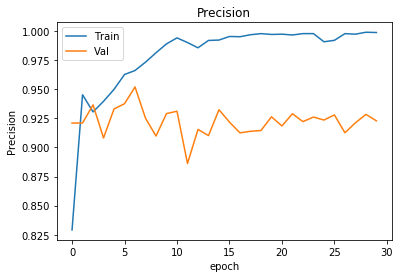

In [75]:
plot_all_2(history_3)

### Neuronale Netze Modelle 1-3 auf Trianingsdaten anwenden und evaluieren

In [142]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
    
  print('Total Passed Tests: ', np.sum(cm[1]))

In [143]:
BATCH_SIZE = 573

In [144]:
test_predictions_baseline = model_deeper_1.predict(X_test_nn, batch_size=BATCH_SIZE)

loss :  1.1349095051441718
tp :  1316.0
fp :  127.0
tn :  204.0
fn :  97.0
accuracy :  0.8715596
precision :  0.9119889
recall :  0.9313517
auc :  0.8146025

Total Fraudulent Transactions:  1413


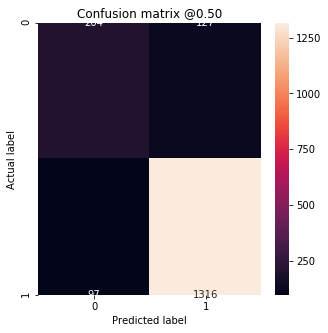

In [145]:
baseline_results = model_deeper_1.evaluate(X_test_nn, y_test_nn,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_deeper_1.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test_nn, test_predictions_baseline)

In [146]:
test_predictions_baseline = model_deeper_reg_2.predict(X_test_nn, batch_size=BATCH_SIZE)

loss :  0.5480348842406492
tp :  1328.0
fp :  135.0
tn :  196.0
fn :  85.0
accuracy :  0.8738532
precision :  0.90772384
recall :  0.9398443
auc :  0.8770887

Total Fraudulent Transactions:  1413


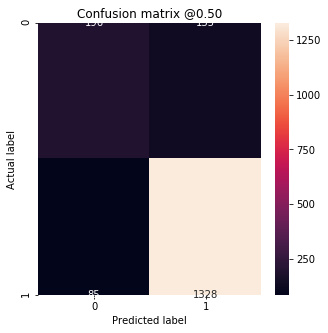

In [147]:
baseline_results = model_deeper_reg_2.evaluate(X_test_nn, y_test_nn,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_deeper_reg_2.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test_nn, test_predictions_baseline)

In [148]:
test_predictions_baseline = model_deeper_reg_3.predict(X_test_nn, batch_size=BATCH_SIZE)

loss :  0.6831390053683192
tp :  1300.0
fp :  103.0
tn :  228.0
fn :  113.0
accuracy :  0.8761468
precision :  0.9265859
recall :  0.9200283
auc :  0.8690858

Total Fraudulent Transactions:  1413


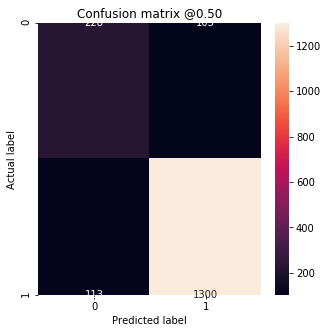

In [149]:
baseline_results = model_deeper_reg_3.evaluate(X_test_nn, y_test_nn,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_deeper_reg_3.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test_nn, test_predictions_baseline)

### Random Forest Modell auf Trianingsdaten anwenden und evaluieren

In [150]:
y_test_predicted = clf.predict(X_test)

In [151]:
def plot_cm_rf(labels, predictions):
  cm = confusion_matrix(labels, predictions, labels = [0,1])
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('tp: ', cm[1][1])
  print('fp: ', cm[0][1])
  print('tn: ', cm[0][0])
  print('fn: ', cm[1][0])
  print('Total Passed Tests: ', np.sum(cm[1]))

tp:  1374
fp:  121
tn:  210
fn:  39
Total Fraudulent Transactions:  1413
accuracy :  0.908256880733945
precision :  0.9190635451505017
recall :  0.9723991507430998


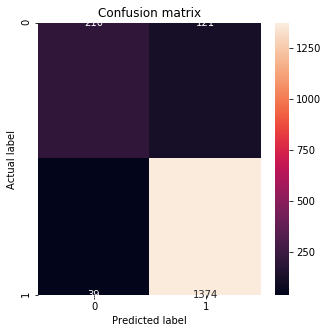

In [152]:
plot_cm_rf(y_test, y_test_predicted)
rs = recall_score(y_test, y_test_predicted)
ps = precision_score(y_test, y_test_predicted)
ass = accuracy_score(y_test, y_test_predicted)
print('accuracy : ', ass)
print('precision : ', ps)
print('recall : ', rs)



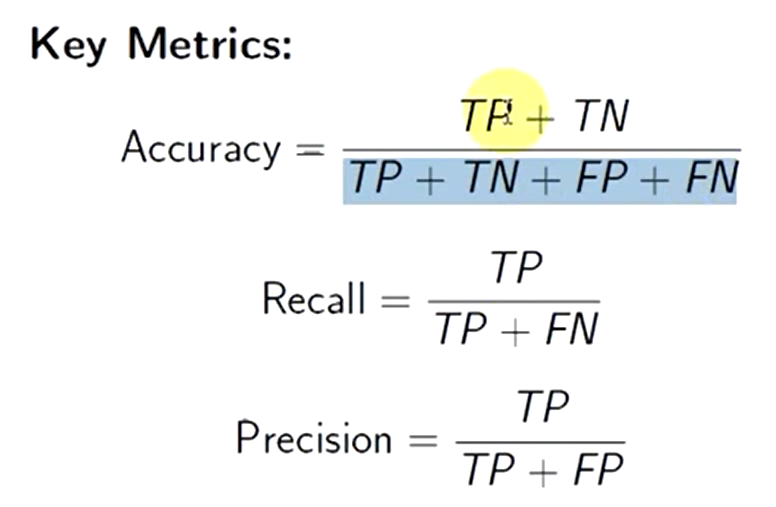

### Fazit
Von allen hier gewählten Modellen performt das "Random Forest" aus Gesamtsicht am Besten. Angewendet auf die Aufgabenstellung sollten möglichst keine bzw. wenige "Failed" Instrumente an den Kunden geliefert werden. Die Anzahl an fp sollte daher möglichst 0 bzw. gering sein. Wird das in Betracht gezogen, dann performt das Modell "model_deeper_reg_3" bezogen auf die Problemstellung am Besten.

